In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import pickle
from skimage import io, transform
import cv2
%matplotlib inline

In [14]:
DATASET_PATH = '/home/ilambda/DeepFashion/Category_and_Attribute_prediction_benchmark'

## Process list_attr_cloth.txt
- total of 1000 different attributes for images
- 1000 attributes are divided into 5 types
- In attribute type, 
    - "1" represents texture-related attributes, 
    - "2" represents fabric-related attributes,
    - "3" represents shape-related attributes, 
    - "4" represents part-related attributes, 
    - "5" represents style-related attributes;
- Save the feature names as 'image_all_feature_cols.pickle'

In [133]:
df_attr_names = pd.read_csv('/home/ilambda/DeepFashion/Category_and_Attribute_prediction_benchmark/list_attr_cloth.txt', delimiter='\t', skiprows=[0,1], names=['label'] )
df_attr_names['attribute_type'] = df_attr_names['label'].apply(lambda x: x.rstrip().rsplit()[-1])
df_attr_names['attribute_name'] = df_attr_names['label'].apply(lambda x: ' '.join(x.rstrip().rsplit()[:-1]))
df_attr_names.drop('label', axis=1, inplace=True)
df_attr_names.head()
df_attr_names.to_csv('attributes_name_mapping.csv', index_label='index')

In [134]:
attributes_names = pd.read_csv('attributes_name_mapping.csv', index_col='index', dtype={'attribute_type': int})
attributes_names.head()

,attribute_type,attribute_name
index,,
0,3,a-line
1,1,abstract
2,1,abstract chevron
3,1,abstract chevron print
4,1,abstract diamond


In [152]:
attributes_names.shape

(1000, 2)

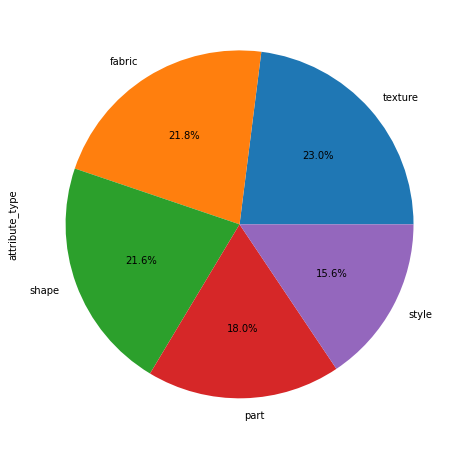

In [216]:
plt.figure(figsize=(8,8))
l = ["texture", "fabric", "shape", "part", "style"]
attributes_names.attribute_type.value_counts().plot(kind='pie', labels=l, autopct='%1.1f%%')
plt.show()

In [143]:
col_names = attributes_names['attribute_name'].values.tolist()
with open('image_all_feature_cols.pickle', 'wb') as f:
    pickle.dump(col_names, f)

## Process list_attr_img.txt
- Each image is associated with 1000 attributes
- In attribute labels, "1" represents positive while "-1" represents negative, '0' represents unknown;
- Attribute prediction is treated as a multi-label tagging problem.
- The processed df is saved as image_attributes.csv

#### Load the attribute features

In [145]:
with open('image_all_feature_cols.pickle', 'rb') as f:
    col_names = pickle.load(f)
col_names = ['image_name'] + col_names
#col_names

In [140]:
df_attr = pd.read_csv('/home/ilambda/DeepFashion/Category_and_Attribute_prediction_benchmark/list_attr_img.txt', delim_whitespace=1, skiprows=[0,1], names=col_names)

In [149]:
df_attr.to_csv('image_attributes.csv', index_label='index')

In [150]:
df_attr = pd.read_csv('image_attributes.csv', index_col='index')
df_attr.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
index,,,,,,,,,,,,,,,,,,,,,
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
df_attr.to_n

In [272]:
from collections import Counter

In [274]:
l = df_attr[df_attr.columns[1:]].to_numpy().flatten()

In [273]:
c = Counter(df_attr[df_attr.columns[1:]].to_numpy().flatten())

In [278]:
c[1]/len(l)

0.003322741700147292

In [279]:
c[-1]/len(l)

0.9966772582998527

In [151]:
df_attr.shape

(289222, 1001)

## Process list_bbox.txt
- Processed data is stored as image_boundingbox.csv
- each row contains x_1, y_1, x_2, y_2 - the coordinates of two bounding boxes

In [154]:
df_bb = pd.read_csv('/home/ilambda/DeepFashion/Category_and_Attribute_prediction_benchmark/list_bbox.txt', delim_whitespace=1, skiprows=[0])
df_bb.head()

,image_name,x_1,y_1,x_2,y_2
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,72,79,232,273
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,67,59,155,161
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,65,65,156,200
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,51,62,167,182
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,46,88,166,262


In [155]:
df_bb.shape

(289222, 5)

In [156]:
df_bb.to_csv('image_boundingbox.csv', index_label='index')

## Process list_category_cloth.txt
- total of 50 categories of cloth divided into 3 categories
- save it as cloth_category_mapping.csv
- save category_names as category_names_list.pickle
- In category type, "1" represents upper-body clothes, "2" represents lower-body clothes, "3" represents full-body clothes

In [280]:
cat_cloth_df = pd.read_csv(os.path.join(DATASET_PATH, 'list_category_cloth.txt'), delim_whitespace=8, skiprows=[0])
cat_cloth_df.head(10)

,category_name,category_type
0,Anorak,1
1,Blazer,1
2,Blouse,1
3,Bomber,1
4,Button-Down,1
5,Cardigan,1
6,Flannel,1
7,Halter,1
8,Henley,1
9,Hoodie,1


In [162]:
cat_cloth_df.shape

(50, 2)

In [244]:
cat_name_type = {cat_cloth_df.iloc[i]['category_name']: cat_cloth_df.iloc[i]['category_type'] for i in cat_cloth_df.index}

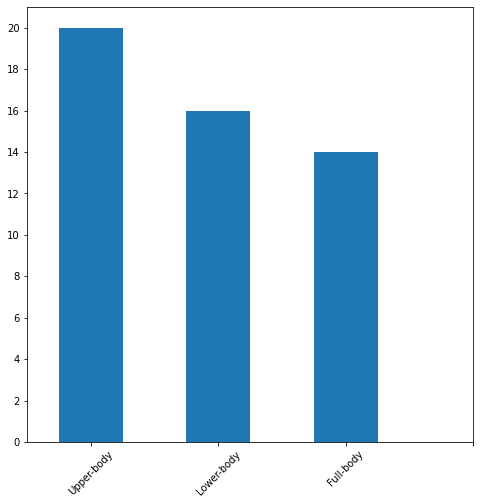

In [241]:
plt.figure(figsize=(8,8))
cat_cloth_df.category_type.value_counts().plot(kind='bar')
plt.xticks([0,1,2,3], labels=['Upper-body','Lower-body','Full-body'], rotation=45)
plt.yticks([a for a in range(0,21,2)], labels=[a for a in range(0,21,2)])
plt.show()

In [200]:
category_names = cat_cloth_df.category_name.values.tolist()
cat_names_labels_mapping = {cat: i+1 for i, cat in enumerate(category_names)}
labels_cat_names_mapping = {i+1: cat for i, cat in enumerate(category_names)}

In [164]:
cat_cloth_df.to_csv('cloth_category_mapping.csv', index_label='index')

In [165]:
with open('category_names_list.pickle', 'wb') as f:
    pickle.dump(cat_cloth_df.category_name.values.tolist(), f)

## Process list_category_img.txt

- In category type, "1" represents upper-body clothes, "2" represents lower-body clothes, "3" represents full-body clothes
- Saved as image_category_mapping.csv


In [166]:
cat_img_df = pd.read_csv(os.path.join(DATASET_PATH,'list_category_img.txt'), delim_whitespace=8, skiprows=[0])
cat_img_df.head()

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3


In [205]:
cat_img_df['category_name'] = cat_img_df['category_label'].apply(lambda x: labels_cat_names_mapping[x])

In [246]:
cat_img_df['category_type'] = cat_img_df['category_name'].apply(lambda x: cat_name_type[x])

In [247]:
cat_img_df.head()

,image_name,category_label,category_name,category_type
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,Blouse,1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,Blouse,1


In [168]:
cat_img_df.shape

(289222, 2)

In [193]:
# Total 46 categories between (1, 48) and missing 38, 45
len(sorted(cat_img_df.category_label.unique()))

46

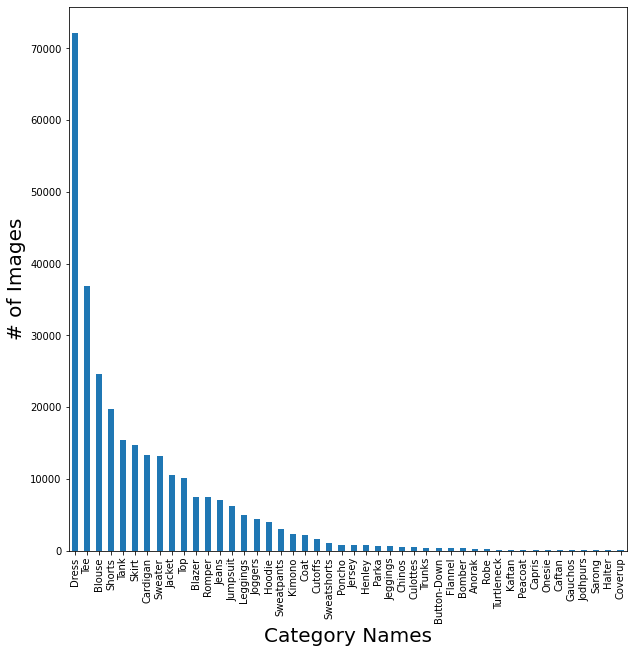

In [281]:
plt.figure(figsize=(10,10))
cat_img_df.category_name.value_counts().plot(kind='bar')
plt.xlabel('Category Names', fontsize=20)
plt.ylabel('# of Images', fontsize=20)
plt.show()

In [ ]:
cat_cloth_df.plot()

In [ ]:
sns.barplot()

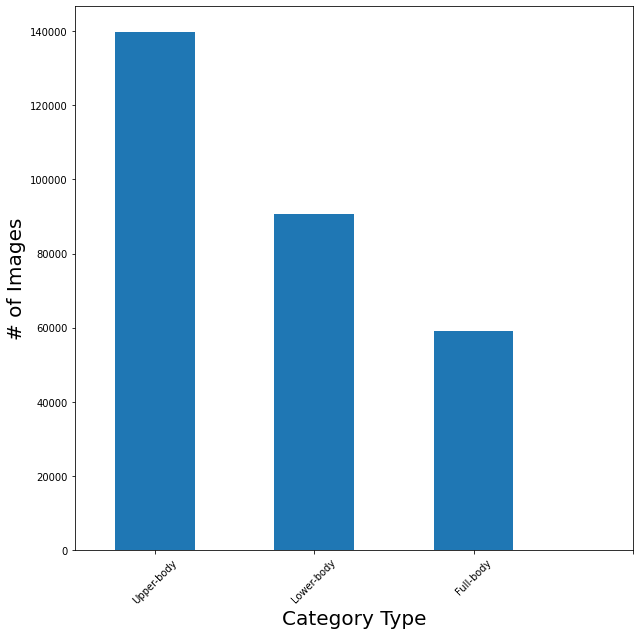

In [264]:
plt.figure(figsize=(10,10))
cat_img_df.category_type.value_counts().plot(kind='bar')

plt.xlabel('Category Type', fontsize=20)
plt.ylabel('# of Images', fontsize=20)
plt.xticks([0,1,2,3], labels=['Upper-body','Lower-body','Full-body'], rotation=45)
plt.show()

In [248]:
cat_img_df.to_csv('image_category_mapping.csv', index_label='index')

## Process list_landmarks.txt
- variation_type is missing in the data while the header is present. It is creating mismatch as landmark_visibility_1 data is been taken over by variation_type column

In [171]:
landmarks_df = pd.read_csv(os.path.join(DATASET_PATH, 'list_landmarks.txt'), delim_whitespace=1, skiprows=[0])

In [172]:
landmarks_df.head()

,image_name,clothes_type,variation_type,landmark_visibility_1,landmark_location_x_1,landmark_location_y_1,landmark_visibility_2,landmark_location_x_2,landmark_location_y_2,landmark_visibility_3,...,landmark_location_y_5,landmark_visibility_6,landmark_location_x_6,landmark_location_y_6,landmark_visibility_7,landmark_location_x_7,landmark_location_y_7,landmark_visibility_8,landmark_location_x_8,landmark_location_y_8
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,1,0,146,102,0,173,95,0,94,...,0.0,177.0,232.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,1,0,107,67,0,122,67,0,79,...,0.0,134.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,1,0,101,79,0,116,76,0,78,...,0.0,118.0,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,1,0,96,74,0,113,72,0,67,...,0.0,120.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,1,1,102,106,0,116,102,0,63,...,0.0,137.0,246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
landmarks_df.clothes_type.value_counts()

1    139709
3     90550
2     58963
Name: clothes_type, dtype: int64

In [64]:
def get_bb(df, i):
    b1 = tuple(df.iloc[i][['x_1','y_1']].values)
    b2 = tuple(df.iloc[i][['x_2','y_2']].values)
    
    return b1, b2

def display_image_grid(df, start=0, end=9, rang=[]):
    count = end - start
    cols = 4
    rows = int(np.ceil(count/cols))
    
    fig,axes = plt.subplots(rows, cols, figsize=(10,10))
    k = start
    for i in range(rows):
        for j in range(cols):
            if k < count:
                im = io.imread(os.path.join(DATASET_PATH, df.iloc[k]['image_name']))
                b1, b2 = get_bb(df, k)
                im = cv2.rectangle(im, b1, b2, (0, 255, 255), 2)
                axes[i,j].imshow(im)
            else:
                plt.delaxes(axes[i,j])
            k += 1

## Train Test Partitions list_eval_partition.txt
- Contains 209222 train images, 40000 val images, 40000 test images


In [180]:
partition_df = pd.read_csv(os.path.join(DATASET_PATH, 'list_eval_partition.txt'), delim_whitespace=8, skiprows=[0])

In [181]:
partition_df.head()

,image_name,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test


In [187]:
partition_df.shape

(289222, 2)

In [188]:
partition_df.to_csv('train_test_split.csv', index_label='index')

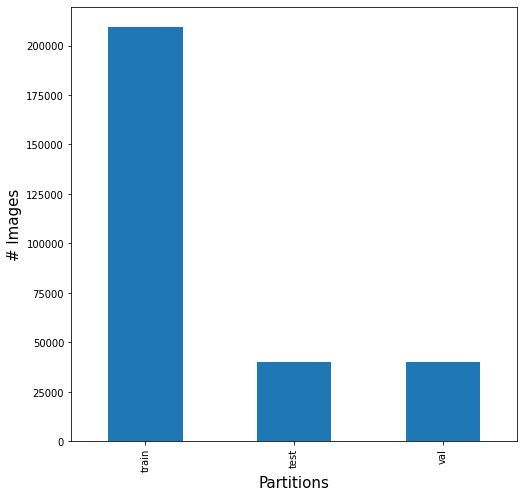

In [283]:
plt.figure(figsize=(8,8))
partition_df.evaluation_status.value_counts().plot(kind='bar')
plt.ylabel("# Images", fontsize=15)
plt.xlabel("Partitions", fontsize=15)
plt.show()

In [184]:
val_index = partition_df[partition_df.evaluation_status == "val"].index

In [186]:
df_bb.iloc[val_index].shape

(40000, 5)

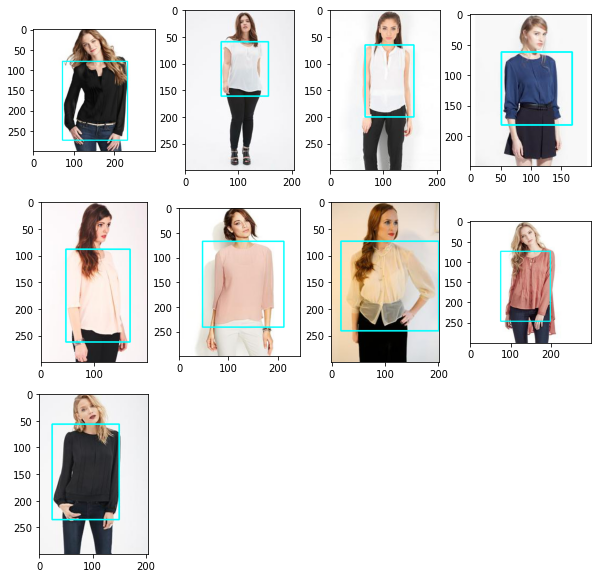

In [65]:
display_image_grid(df)

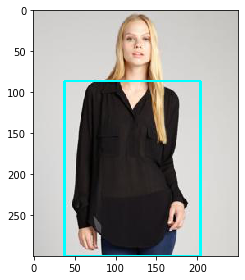

(38, 86) (204, 300)


In [55]:
i = 22
b1 = tuple(df_bb.iloc[i][['x_1','y_1']].values)
b2 = tuple(df_bb.iloc[i][['x_2','y_2']].values)
im = io.imread(os.path.join(DATASET_PATH, df_bb.iloc[i]['image_name']))
#im.shape
im = cv2.rectangle(im, b1, b2, (0, 255, 255), 2)
io.imshow(im)
plt.show()
print(b1, b2)